In [1]:
#Importing packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read file into dataframe 
data = pd.read_excel('/Users/Owner/Documents/Lboro_data_science/Applied Machine Learning/Dry_Bean_Dataset.xlsx')

## link to data https://archive.ics.uci.edu/ml/machine-learning-databases/00602/ 

## Data Exploration & Pre-processing

In [3]:
data.head() #viewing first 5 rows of dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
print(data.shape)  #prints number of observations and number of attributes  (observations, attributes)

(13611, 17)


In [5]:
data = data.drop_duplicates() #drops duplicate rows in dataframe
print(data.shape) #prints new number of observations and number of attributes  (observations, attributes)

(13543, 17)


In [6]:
print(data.columns) #shows all of the column names

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [7]:
data.columns= data.columns.str.lower() #converting all column names into lowercase
data.columns



Index(['area', 'perimeter', 'majoraxislength', 'minoraxislength',
       'aspectration', 'eccentricity', 'convexarea', 'equivdiameter', 'extent',
       'solidity', 'roundness', 'compactness', 'shapefactor1', 'shapefactor2',
       'shapefactor3', 'shapefactor4', 'class'],
      dtype='object')

In [8]:
data.rename(columns={'aspectration':'aspectratio'}, inplace = True)

In [9]:
data.dtypes #viewing the datatype of every column

area                 int64
perimeter          float64
majoraxislength    float64
minoraxislength    float64
aspectratio        float64
eccentricity       float64
convexarea           int64
equivdiameter      float64
extent             float64
solidity           float64
roundness          float64
compactness        float64
shapefactor1       float64
shapefactor2       float64
shapefactor3       float64
shapefactor4       float64
class               object
dtype: object

In [10]:
data['class'].unique() #viewing the different types of classes in this dataframe

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: class, dtype: int64


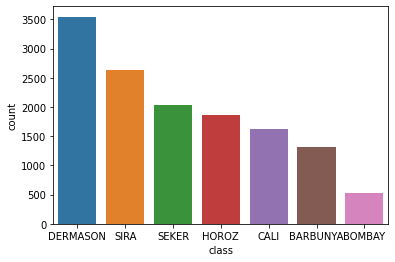

In [11]:
#Importing package required for this visualisation
import seaborn as sns 


#viewing the number of values for each class
sns.countplot(x='class', data=data, order = data['class'].value_counts().index)

print(data['class'].value_counts())

In [12]:
data.info() #checking for any missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             13543 non-null  int64  
 1   perimeter        13543 non-null  float64
 2   majoraxislength  13543 non-null  float64
 3   minoraxislength  13543 non-null  float64
 4   aspectratio      13543 non-null  float64
 5   eccentricity     13543 non-null  float64
 6   convexarea       13543 non-null  int64  
 7   equivdiameter    13543 non-null  float64
 8   extent           13543 non-null  float64
 9   solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  compactness      13543 non-null  float64
 12  shapefactor1     13543 non-null  float64
 13  shapefactor2     13543 non-null  float64
 14  shapefactor3     13543 non-null  float64
 15  shapefactor4     13543 non-null  float64
 16  class            13543 non-null  object 
dtypes: float64(1

In [13]:
data.isnull().sum() #checking dataframe for any null values

area               0
perimeter          0
majoraxislength    0
minoraxislength    0
aspectratio        0
eccentricity       0
convexarea         0
equivdiameter      0
extent             0
solidity           0
roundness          0
compactness        0
shapefactor1       0
shapefactor2       0
shapefactor3       0
shapefactor4       0
class              0
dtype: int64

In [14]:
data.describe() #shows info on all columns except Class as that isn't numeric

,area,perimeter,majoraxislength,minoraxislength,aspectratio,eccentricity,convexarea,equivdiameter,extent,solidity,roundness,compactness,shapefactor1,shapefactor2,shapefactor3,shapefactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


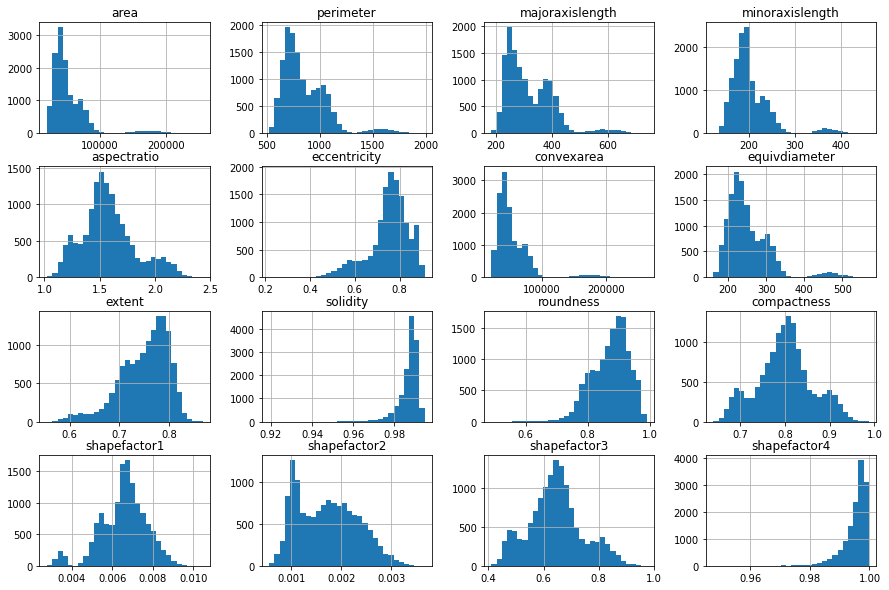

In [15]:
#Importing packages needed for this visualisation
import matplotlib.pyplot as plt
%matplotlib inline

##Visualising Histogram of all attributes, to see their distributions

data.hist(bins=30, figsize=(15, 10))
plt.show()

#can see group/cluster away from main cluster, in Area,Perimeter, MajorAxisLength, MinorAxisLenght, ConvexArea
# EquivDiameter & ShapeFactor 1.

In [16]:
#Importing packages
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#creating a copy of dataframe, where I can store all of labelled and normalised data
normalised_data = data.copy()
normalised_data

# labelling categorical data into numbers (1 to 7)
enc = LabelEncoder()
enc.fit(normalised_data.iloc[:,-1])
enc.classes_

normalised_data.iloc[:,-1] = enc.transform(normalised_data.iloc[:,-1])
print(normalised_data.iloc[:,-1].value_counts()) #checking if correctly labelled


#Normalising numerical data (0 to 1), (all columns but last one)

scaler = MinMaxScaler()
scaler.fit(normalised_data.iloc[:,:-1])

normalised_data.iloc[:,:-1] = scaler.transform(normalised_data.iloc[:,:-1])

normalised_data #showing normalised and labelled table


3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: class, dtype: int64


,area,perimeter,majoraxislength,minoraxislength,aspectratio,eccentricity,convexarea,equivdiameter,extent,solidity,roundness,compactness,shapefactor1,shapefactor2,shapefactor3,shapefactor4,class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,5
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979,5
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,5
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,5
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113,3
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912,3
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025,3
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342,3


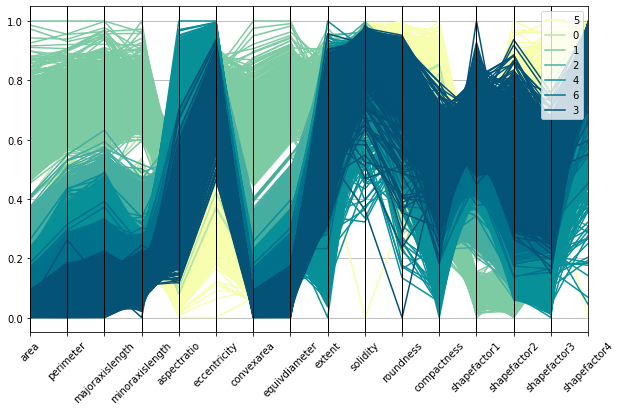

In [17]:
#Importing packages 

from palettable.cartocolors.sequential import BluYl_7


##Visualising parallel coordinate plot 

plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(normalised_data,'class', colormap = BluYl_7.mpl_colormap)
plt.xticks(rotation=45)
plt.savefig('pcp.png')
plt.show()


## Building Model & Evaluating the model

### KNN ( K-Nearest Neighbours Algorithms)

In [18]:
# Import train_test_split function, to split data 

from sklearn.model_selection import train_test_split

X = normalised_data.iloc[:,:-1]
y = normalised_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#Checking the amount of observations in the training and testing sets
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(10834, 16) (2709, 16)
(10834,) (2709,)


The accuracy score for K value 2 is: 0.9003
The accuracy score for K value 4 is: 0.9177
The accuracy score for K value 6 is: 0.9188
The accuracy score for K value 8 is: 0.9195
The accuracy score for K value 10 is: 0.9206
The accuracy score for K value 12 is: 0.921
The accuracy score for K value 14 is: 0.9225
The accuracy score for K value 16 is: 0.9214
The accuracy score for K value 18 is: 0.9206
The accuracy score for K value 20 is: 0.9228
The accuracy score for K value 22 is: 0.9225
The accuracy score for K value 24 is: 0.924
The accuracy score for K value 26 is: 0.9221
The accuracy score for K value 28 is: 0.921
The accuracy score for K value 30 is: 0.9225
The accuracy score for K value 32 is: 0.921
The accuracy score for K value 34 is: 0.9232
The accuracy score for K value 36 is: 0.9228
The accuracy score for K value 38 is: 0.9225


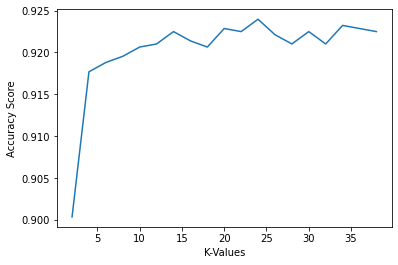

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
## finding what value for K creates most accurate model

list_1 = []

for k in range(2,40,2):
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    list_1.append(metrics.accuracy_score(y_test, y_pred))
    print('The accuracy score for K value %s is:' % (k), round(metrics.accuracy_score(y_test, y_pred), 4),)

    
#plotting accuracy score for each k-value
k_values_plot = sns.lineplot(x=range(2,40,2), y = list_1)
k_values_plot.set_xlabel("K-Values")
k_values_plot.set_ylabel("Accuracy Score")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       259
           1       1.00      1.00      1.00       114
           2       0.89      0.97      0.93       305
           3       0.92      0.91      0.92       707
           4       0.97      0.94      0.96       376
           5       0.94      0.95      0.94       414
           6       0.87      0.89      0.88       534

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

The f1 score for this model is: 0.924 
The test accuracy for this model is 0.924


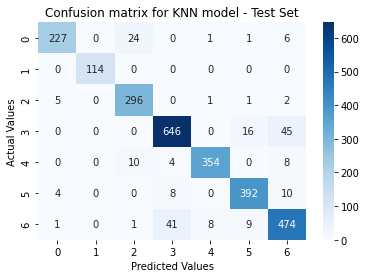

In [20]:
# 24 is the optimal value for K 

#Generating KNN model where K = 24

knn = KNeighborsClassifier(n_neighbors=24, weights = 'distance')

#Training model by using the training set 

knn.fit(X_train, y_train)

#Predicting the model on the testing set
y_pred = knn.predict(X_test)

#f1 and accuracy score metrics for this model
test_f1 = metrics.f1_score(y_test, y_pred, average='weighted')
test_acc = metrics.accuracy_score(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))

#Printing the f1 score and the accuracy score for this model
print('The f1 score for this model is:', round(test_f1, 4),'\nThe test accuracy for this model is', round(test_acc, 4))


# Creating a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for KNN model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()




### Cross-Validation (10-Fold)

In [21]:
#Importing packages
from sklearn.model_selection import GridSearchCV, cross_val_score

k_range = list(range(1,31))

#Finding best parameters from cross-validation via GridSearch CV

param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8894025628587157
{'n_neighbors': 26}
KNeighborsClassifier(n_neighbors=26, weights='distance')


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       259
           1       1.00      1.00      1.00       114
           2       0.89      0.97      0.93       305
           3       0.92      0.91      0.92       707
           4       0.98      0.94      0.96       376
           5       0.94      0.95      0.94       414
           6       0.87      0.88      0.87       534

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

The f1 score for this model is: 0.9222 
The test accuracy for this model is 0.9221


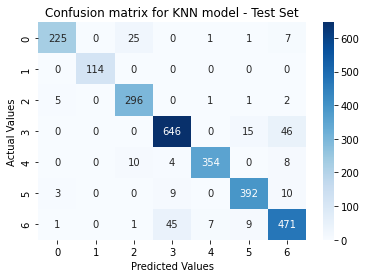

In [22]:
#Importing packages

#Knn Model 
knn = KNeighborsClassifier(n_neighbors=26, weights = 'distance')

#Training model by using the training set 

knn.fit(X_train, y_train)

#Predicting the model on the testing set
y_pred = knn.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

#f1 and accuracy score metrics for this model
test_f1 = metrics.f1_score(y_test, y_pred, average='weighted')
test_acc = metrics.accuracy_score(y_test, y_pred)

#Printing the f1 score and the accuracy score for this model
print('The f1 score for this model is:', round(test_f1, 4),'\nThe test accuracy for this model is', round(test_acc, 4))

# Creating a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for KNN model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.savefig('cm.png')
plt.show()

In [23]:
# X,y will automatically divided into 10 folds, and the accuracy score for each model will be stored
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores) #showing the accuracy score for each model
print(np.mean(scores)) #showing the mean accuracy score across the 10 models

# chooseing k between 2 to 30
k_range = range(2,32,2)
k_scores = []

# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation scores

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())


[0.68265683 0.85682657 0.9498155  0.97119645 0.97341211 0.97193501
 0.9689808  0.95051699 0.89143279 0.67725258]
0.8894025628587157


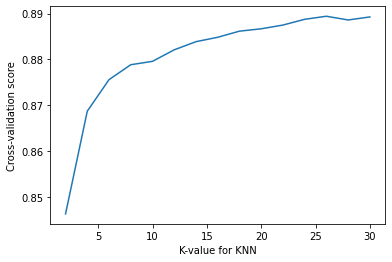

In [24]:
#Plot Cross-validation
cv_plot = sns.lineplot(k_range, k_scores)
cv_plot.set_xlabel("K-value for KNN")
cv_plot.set_ylabel("Cross-validation score")
plt.show() #26 gives highest score

## Logisitic regressor

In [25]:
#Import packages

from sklearn.linear_model import LogisticRegression

#Training model by using the training set 

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

lr.fit(X_train, y_train)

#Predicting the model on the testing set

y_pred = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

#f1 and accuracy score metrics for this model
test_f1 = metrics.f1_score(y_test, y_pred, average='weighted')
test_acc = metrics.accuracy_score(y_test, y_pred)

#Printing the f1 score and the accuracy score for this model
print('The f1 score for this model is:', round(test_f1, 4),'\nThe test accuracy for this model is', round(test_acc, 4))







              precision    recall  f1-score   support

           0       0.96      0.88      0.92       259
           1       1.00      1.00      1.00       114
           2       0.92      0.96      0.94       305
           3       0.92      0.89      0.90       707
           4       0.95      0.95      0.95       376
           5       0.94      0.93      0.94       414
           6       0.83      0.88      0.86       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

The f1 score for this model is: 0.9154 
The test accuracy for this model is 0.9151


## Cross Validation

In [26]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedStratifiedKFold

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


/Users/Owner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Owner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/Owner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Owner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [27]:
print(mean(n_scores))


0.9177932089512919
